In [1]:
# 基本误差线(errorbar)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

<ErrorbarContainer object of 3 artists>

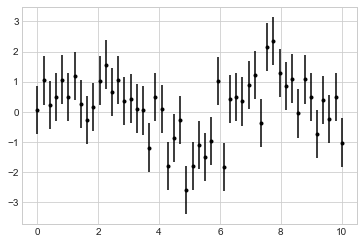

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

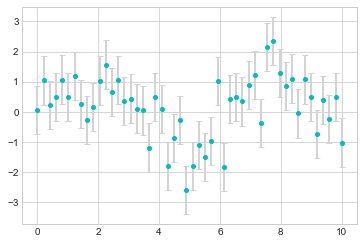

In [3]:
plt.errorbar(x, y, yerr=0.8, fmt='o', c='c', markersize=4, ecolor='lightgray', elinewidth=2, capsize=3)

In [ ]:
# 连续误差
# 例子：高斯过程回归方法
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程拟合结果
gp = GaussianProcessRegressor(alpha=1e-2, random_state=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)

yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', c='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, c='gray', alpha=0.2)
plt.xlim(0, 10)

In [ ]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);